In [14]:
import os
os.chdir(f"{globals()['_dh'][0]}/..")  # Set cwd up one level

from etron import e_tron
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sns
sns.set()

In [15]:
cycle = pd.read_csv("data/hwycol.txt", sep="\t")

In [16]:
ev = e_tron()
ev.simulate(cycle)
ev.chassis.mass = 2595
final_soc = ev.log["SOC"][-1]
print(f"Final SOC: {final_soc * 100}%")

x = ev.log["Time (s)"]
y1 = ev.log["SOC"] * 100

Final SOC: 97.25421392807554%


In [17]:
ev = e_tron()
ev.solar_irradiance = 848
ev.simulate(cycle)
final_soc = ev.log["SOC"][-1]
print(f"Final SOC: {final_soc * 100}%")

y2 = ev.log["SOC"] * 100

Final SOC: 97.42150442260073%


In [18]:
ev = e_tron()
ev.solar_irradiance = 226
ev.simulate(cycle)
final_soc = ev.log["SOC"][-1]
print(f"Final SOC: {final_soc * 100}%")

y3 = ev.log["SOC"] * 100

Final SOC: 97.29879842307861%


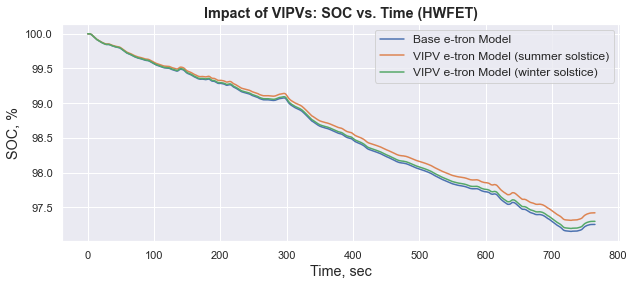

In [19]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax.set_title("Impact of VIPVs: SOC vs. Time (HWFET)", fontsize="large", fontweight="bold")
ax.set_xlabel("Time, sec", fontsize="large")
ax.set_ylabel("SOC, %", fontsize="large")

ax.plot(x, y1, label="Base e-tron Model")
ax.plot(x, y2, label="VIPV e-tron Model (summer solstice)")
ax.plot(x, y3, label="VIPV e-tron Model (winter solstice)")
ax.legend(prop={'size': 12})